In [2]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore") 

In [3]:
data = pd.read_csv('C:\ML\carIndia-2021.csv')

In [4]:
data.head(5)

,model_year,maker,model_name,city,distance_covered (km),fuel_type,pre_owner,price (₹)
0,2012,Maruti,Alto K10 VXI,Mumbai,29067,Petrol,2nd Owner,165199
1,2011,Hyundai,i20 SPORTZ 1.2 O,Mumbai,36791,Petrol,2nd Owner,326099
2,2010,Maruti,A Star VXI,Mumbai,35171,Petrol,1st Owner,195199
3,2011,Hyundai,Santro Xing GLS,Mumbai,19908,Petrol,1st Owner,195199
4,2012,Hyundai,Santro Xing GLS,Mumbai,43847,Petrol,3rd Owner,203299


In [5]:
data["city"].unique()

array(['Mumbai', 'New Delhi', 'Bengaluru', 'Hyderabad', 'Pune', 'Chennai',
       'Ahmedabad', 'Kolkata'], dtype=object)

In [6]:
data["fuel_type"].unique()

array(['Petrol', 'Petrol + CNG', 'Diesel', 'Petrol + LPG', 'Electric'],
      dtype=object)

In [7]:
data["model_name"].unique()

array(['Alto K10 VXI', 'i20 SPORTZ 1.2 O', 'A Star VXI',
       'Santro Xing GLS', 'Eon SPORTZ', 'Wagon R 1.0 LXI',
       'i10 MAGNA 1.1 IRDE2', 'Swift Dzire VXI', 'Brio 1.2 S MT I VTEC',
       'Swift Dzire VXI 1.2 BS IV', 'Etios Liva G', 'Wagon R 1.0 VXI',
       'Alto LXI', 'Zen Estilo LXI', 'i10 MAGNA 1.2 KAPPA2',
       'Wagon R 1.0 LXI CNG', 'Figo 1.2 ZXI DURATEC',
       'Grand i10 SPORTZ 1.2 KAPPA VTVT', 'Swift ZXI',
       'Jetta TRENDLINE 1.6', 'i10 SPORTZ 1.1 IRDE2', 'Etios G',
       'Celerio ZXI AMT', 'Alto 800 VXI', 'Swift VXI', 'Swift VDI',
       'Grand i10 SPORTS 1.2 VTVT', 'i10 SPORTZ 1.2 KAPPA2',
       'Amaze 1.2 SMT I VTEC', 'Ritz VXI BS IV', 'Alto 800 LXI',
       'i10 SPORTZ 1.2 AT KAPPA2', 'i20 ASTA 1.2', 'Alto K10 LXI',
       'Celerio VXI', 'Celerio VXI AMT', 'Alto K10 VXI AMT',
       'SELTOS GTX + AT PETROL', 'Grand i10 ASTA 1.2 KAPPA VTVT',
       'Kuv100 K6+ 6 STR', 'Wagon R VXI', 'Celerio ZXI OPT',
       'Grand i10 ASTA 1.2 (O) VTVT', 'i20 MAGNA 1.2 VTV

In [8]:
data.describe()

,model_year,distance_covered (km),price (₹)
count,3365.000000,3365.000000,3.365000e+03
mean,2013.876374,60937.813967,4.336549e+05
std,3.035588,41342.775191,2.595909e+05
min,2001.000000,60.000000,2.700000e+04
25%,2012.000000,30598.000000,2.769990e+05
50%,2014.000000,53488.000000,3.647990e+05
75%,2016.000000,82414.000000,4.975990e+05
max,2021.000000,428123.000000,3.600000e+06


In [9]:
def split_model(model):
    parts=model.split(" ")
    Model=" ".join(parts[:1])
    suffix=parts[-1]
    return Model,suffix
data[["Model","suffix"]]=data["model_name"].apply(lambda x:pd.Series(split_model(x)))

In [10]:
data.head(5)

,model_year,maker,model_name,city,distance_covered (km),fuel_type,pre_owner,price (₹),Model,suffix
0,2012,Maruti,Alto K10 VXI,Mumbai,29067,Petrol,2nd Owner,165199,Alto,VXI
1,2011,Hyundai,i20 SPORTZ 1.2 O,Mumbai,36791,Petrol,2nd Owner,326099,i20,O
2,2010,Maruti,A Star VXI,Mumbai,35171,Petrol,1st Owner,195199,A,VXI
3,2011,Hyundai,Santro Xing GLS,Mumbai,19908,Petrol,1st Owner,195199,Santro,GLS
4,2012,Hyundai,Santro Xing GLS,Mumbai,43847,Petrol,3rd Owner,203299,Santro,GLS


In [11]:
data=data.drop(["model_name","suffix","maker","city"],axis=1)

In [12]:
data.head(5)

,model_year,distance_covered (km),fuel_type,pre_owner,price (₹),Model
0,2012,29067,Petrol,2nd Owner,165199,Alto
1,2011,36791,Petrol,2nd Owner,326099,i20
2,2010,35171,Petrol,1st Owner,195199,A
3,2011,19908,Petrol,1st Owner,195199,Santro
4,2012,43847,Petrol,3rd Owner,203299,Santro


In [13]:
data.groupby("Model").count()

,model_year,distance_covered (km),fuel_type,pre_owner,price (₹)
Model,,,,,
3,6,6,6,6,6
5,4,4,4,4,4
800,1,1,1,1,1
A,16,16,16,16,16
A3,1,1,1,1,1
...,...,...,...,...,...
YARIS,3,3,3,3,3
Yeti,1,1,1,1,1
Zen,27,27,27,27,27


In [14]:
data["Model"].unique()

array(['Alto', 'i20', 'A', 'Santro', 'Eon', 'Wagon', 'i10', 'Swift',
       'Brio', 'Etios', 'Zen', 'Figo', 'Grand', 'Jetta', 'Celerio',
       'Amaze', 'Ritz', 'SELTOS', 'Kuv100', 'Baleno', 'Polo', 'Verna',
       'NEW', 'Go', 'Benz', 'Elite', 'TIGOR', 'City', 'Jazz', 'Vento',
       'Ertiga', 'Kwid', 'Redi', 'IGNIS', 'WR-V', 'TUV300', 'Vitara',
       'Innova', 'Rapid', 'Dzire', 'Creta', 'VENUE', 'XUV500', 'Sunny',
       'Corolla', 'Terrano', 'Fortuner', 'NEXON', 'Tiago', 'Compass',
       'Ciaz', 'Scorpio', 'Duster', 'Superb', 'Accord', 'HECTOR',
       'Ecosport', 'S', 'Yeti', 'New', '5', 'Prius', 'Eeco', 'Ameo',
       'Quanto', 'Xcent', 'Manza', 'Civic', 'Hexa', '3', 'Santa',
       'Mobilio', 'Beat', 'Laura', 'Rexton', 'Punto', 'Cruze', 'Camry',
       'CRV', 'Nano', 'TRIBER', 'Fiesta', 'YARIS', 'GRAND', 'Spark',
       'OMNI', 'Micra', 'E2O', 'Indica', 'A3', 'Omni', 'Pulse', 'Thar',
       'Indigo', 'BR-V', 'Q3', 'Safari', 'Accent', 'Maxximo', 'Sail',
       'XL6', 'Octavia', 

In [15]:
data1=data.groupby(["Model"]).size().reset_index(name="count").sort_values(["count"],ascending=False)

In [16]:
data1

,Model,count
98,Swift,465
9,Alto,393
110,Wagon,234
121,i10,209
50,Grand,133
...,...,...
86,S60,1
90,Sail,1
33,E2O,1
93,Scala,1


### swift

In [17]:
data_swift=data.loc[data.Model=="Swift"]

In [18]:
data_swift.head(5)

,model_year,distance_covered (km),fuel_type,pre_owner,price (₹),Model
10,2009,42533,Petrol,2nd Owner,274899,Swift
12,2015,23070,Petrol,2nd Owner,478799,Swift
28,2012,50581,Petrol,1st Owner,406299,Swift
36,2012,47260,Petrol,1st Owner,364799,Swift
37,2012,50525,Diesel,1st Owner,376799,Swift


### Alto

In [19]:
data_alto = data.loc[data.Model=="Alto"]

In [20]:
data_alto.head(5)

,model_year,distance_covered (km),fuel_type,pre_owner,price (₹),Model
0,2012,29067,Petrol,2nd Owner,165199,Alto
6,2010,50742,Petrol,2nd Owner,170399,Alto
7,2015,12657,Petrol,1st Owner,282299,Alto
17,2010,34995,Petrol,1st Owner,165999,Alto
34,2015,8322,Petrol,1st Owner,286399,Alto


### Wagon

In [21]:
data_wagon = data.loc[data.Model=="Wagon"]

In [22]:
data_wagon.head(5)

,model_year,distance_covered (km),fuel_type,pre_owner,price (₹),Model
8,2013,13688,Petrol,1st Owner,326199,Wagon
14,2011,18514,Petrol,1st Owner,269399,Wagon
16,2012,20712,Petrol,2nd Owner,258399,Wagon
19,2012,39652,Petrol,3rd Owner,288299,Wagon
21,2014,6858,Petrol,1st Owner,358399,Wagon


### Combined

In [23]:
combined_data=pd.concat([data_swift,data_alto,data_wagon],axis=0)

In [24]:
combined_data.head(5)

,model_year,distance_covered (km),fuel_type,pre_owner,price (₹),Model
10,2009,42533,Petrol,2nd Owner,274899,Swift
12,2015,23070,Petrol,2nd Owner,478799,Swift
28,2012,50581,Petrol,1st Owner,406299,Swift
36,2012,47260,Petrol,1st Owner,364799,Swift
37,2012,50525,Diesel,1st Owner,376799,Swift


In [25]:
combined_data=pd.get_dummies(combined_data,dtype=int)

In [26]:
combined_data.head(5)

,model_year,distance_covered (km),price (₹),fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner,pre_owner_4th Owner,Model_Alto,Model_Swift,Model_Wagon
10,2009,42533,274899,0,1,0,0,0,1,0,0,0,1,0
12,2015,23070,478799,0,1,0,0,0,1,0,0,0,1,0
28,2012,50581,406299,0,1,0,0,1,0,0,0,0,1,0
36,2012,47260,364799,0,1,0,0,1,0,0,0,0,1,0
37,2012,50525,376799,1,0,0,0,1,0,0,0,0,1,0


In [27]:
corr=combined_data.corr()
corr

,model_year,distance_covered (km),price (₹),fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner,pre_owner_4th Owner,Model_Alto,Model_Swift,Model_Wagon
model_year,1.000000,-0.332116,0.589902,-0.003899,0.016400,0.014366,-0.112159,0.185190,-0.159739,-0.085008,0.002483,0.077723,0.042038,-0.141573
distance_covered (km),-0.332116,1.000000,-0.049384,0.454001,-0.477410,0.076816,0.108164,-0.027847,0.016274,0.023381,0.036118,-0.305099,0.336850,-0.049043
price (₹),0.589902,-0.049384,1.000000,0.343490,-0.253481,-0.100712,-0.082885,0.155933,-0.122632,-0.102872,0.004611,-0.517942,0.639359,-0.164617
fuel_type_Diesel,-0.003899,0.454001,0.343490,1.000000,-0.855815,-0.125882,-0.043086,0.062116,-0.057498,-0.025504,0.028439,-0.402212,0.622880,-0.280131
fuel_type_Petrol,0.016400,-0.477410,-0.253481,-0.855815,1.000000,-0.374412,-0.128149,-0.050487,0.050999,0.021365,-0.068341,0.385178,-0.485003,0.133906
fuel_type_Petrol + CNG,0.014366,0.076816,-0.100712,-0.125882,-0.374412,1.000000,-0.018850,0.005129,-0.007994,-0.015323,0.086239,-0.012985,-0.160465,0.208559
fuel_type_Petrol + LPG,-0.112159,0.108164,-0.082885,-0.043086,-0.128149,-0.018850,1.000000,-0.053831,0.034830,0.055361,-0.003441,-0.036320,-0.069171,0.125840
pre_owner_1st Owner,0.185190,-0.027847,0.155933,0.062116,-0.050487,0.005129,-0.053831,1.000000,-0.924001,-0.279014,-0.069920,-0.058906,0.070245,-0.015746
pre_owner_2nd Owner,-0.159739,0.016274,-0.122632,-0.057498,0.050999,-0.007994,0.034830,-0.924001,1.000000,-0.096759,-0.024248,0.038404,-0.059804,0.027145
pre_owner_3rd Owner,-0.085008,0.023381,-0.102872,-0.025504,0.021365,-0.015323,0.055361,-0.279014,-0.096759,1.000000,-0.007322,0.067130,-0.035690,-0.035515


[]

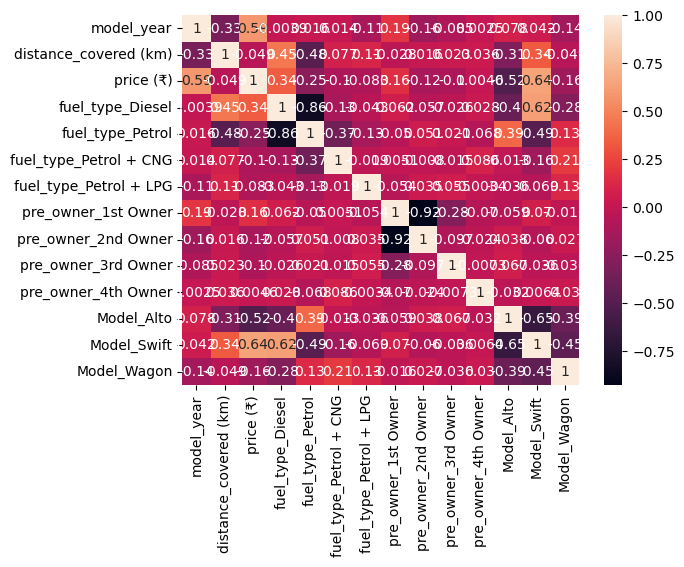

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr,annot=True)
plt.plot()

In [29]:
y=combined_data["price (₹)"]

In [30]:
y.head(5)

10    274899
12    478799
28    406299
36    364799
37    376799
Name: price (₹), dtype: int64

In [31]:
x=combined_data.drop("price (₹)",axis=1)

In [32]:
x.head(5)

,model_year,distance_covered (km),fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Petrol + LPG,pre_owner_1st Owner,pre_owner_2nd Owner,pre_owner_3rd Owner,pre_owner_4th Owner,Model_Alto,Model_Swift,Model_Wagon
10,2009,42533,0,1,0,0,0,1,0,0,0,1,0
12,2015,23070,0,1,0,0,0,1,0,0,0,1,0
28,2012,50581,0,1,0,0,1,0,0,0,0,1,0
36,2012,47260,0,1,0,0,1,0,0,0,0,1,0
37,2012,50525,1,0,0,0,1,0,0,0,0,1,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
for i in range(10):
    for j in range(10,30):
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=(j/100),random_state=i)
        reg=LinearRegression()
        reg.fit(X_train,Y_train)
        ypred=reg.predict(X_test)
        print(i," ",j,r2_score(Y_test,ypred))

0   10 0.7718472552423205
0   11 0.7651938048530649
0   12 0.7697895623255239
0   13 0.7858393339554142
0   14 0.7829050289557609
0   15 0.7873374391017185
0   16 0.7995443676543115
0   17 0.7950230455424074
0   18 0.7966511780849115
0   19 0.7977875453498148
0   20 0.7989713080503642
0   21 0.8005056016916938
0   22 0.8020122306124391
0   23 0.7973197165247181
0   24 0.7959929146318967
0   25 0.7924656446511384
0   26 0.7896808769074244
0   27 0.786158907319622
0   28 0.7890514610924826
0   29 0.7825866050478247
1   10 0.739274839243522
1   11 0.7415472801751788
1   12 0.7464303056919022
1   13 0.7288689281335399
1   14 0.7320959572756478
1   15 0.7326820305603488
1   16 0.7297369971000823
1   17 0.7511922220561829
1   18 0.757269871179092
1   19 0.7640455844534771
1   20 0.7660062168187025
1   21 0.7695445059684717
1   22 0.7732115971238089
1   23 0.7703383198403859
1   24 0.7697407481144024
1   25 0.7671968469396482
1   26 0.7540098423849553
1   27 0.7539965377891817
1   28 0.754785

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.12,random_state=7)

In [35]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
ypred=reg.predict(X_test)

In [36]:
ypred

array([264097.45832413, 204798.38475358, 283677.79147837, 521796.90069725,
       403830.03554116, 311611.3122664 , 422137.0445426 , 343871.49604591,
       222513.6961339 , 246441.47396449, 378049.63210379, 291090.16869904,
       345964.26312803, 182740.21235964, 360983.43334906, 438619.47196826,
       413572.16083211, 152440.93991547, 228961.27223118, 165006.66007793,
       241688.48316175, 344957.10090832, 390231.51309603, 253647.66540839,
       405328.10721117, 411213.78825778, 378453.33972652, 436602.66961574,
       155203.64372332, 225482.46896441, 296472.69603378, 299500.20404729,
       378534.26028232, 381334.29113632, 474322.02399132, 226300.12643631,
       383810.50720762, 442840.98557784, 253690.02650472, 121016.97084904,
       401204.73375088, 407511.53705704, 346762.87841198, 432754.08939999,
       167943.6986492 , 433038.7365061 , 285564.48953784, 461366.2157156 ,
       267388.09391674, 380926.70135693, 440900.24996602, 185155.83623789,
       311619.49263478, 2

In [37]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(Y_test,ypred)

0.8399513624882222

In [38]:
mean_squared_error(Y_test,ypred)

2020913641.353064

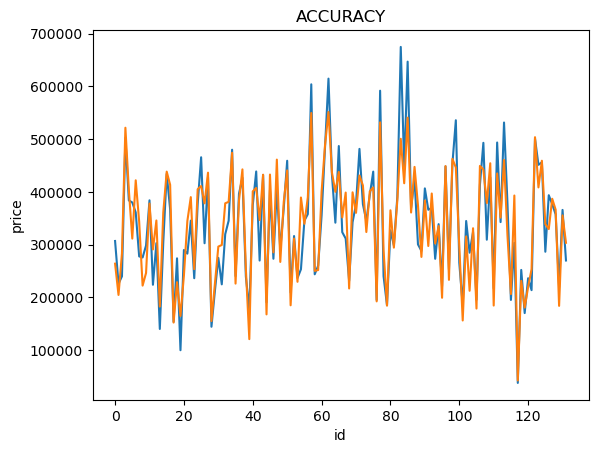

In [41]:
x=np.arange(132)
plt.title("ACCURACY")
plt.xlabel("id")
plt.ylabel("price")
plt.plot(x,Y_test)
plt.plot(x,ypred)